

Computer Sciences for Physics and Chemistry (L2)
---
Homework - Monitoring of chemical reaction with NMR
---



Huseynzada Ibrahim (PE-20)

*Importing libraries:*

First of all, we need to import all libraries that will be used and give access to files from google drive

In [ ]:
from google.colab import drive
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

Now, dat file needs to be imported. To do that "pickle.load()" function is used

In [ ]:
drive.mount('/content/drive')
FILE = open('/content/drive/MyDrive/Homework_L2_2022 (1).dat', 'rb')
data = pickle.load(FILE)
FILE.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's have a look at given data

In [ ]:
print(data)

{'title': 'Esterification of Acetic Acid and n-Propanol', 'Pure Spectrums': {'Acetic Acid': array([0.        , 0.1132005 , 0.22640101, ..., 0.        , 0.        ,
       0.        ]), 'Propanol': array([   0.        ,    0.        ,    0.        , ..., 4871.33660128,
       4870.54470262, 4869.75280395]), 'Propylacetate': array([    0.        ,     0.        ,     0.        , ...,
       12797.79032748, 12795.8048483 , 12793.81936912])}, 'Frequency Min': 0, 'Frequency Max': 6.5536, 'Frequency Step': 0.0001, 'Measurements': [{'Time': 0.0, 'Data': array([0.00000000e+00, 2.26401007e+00, 4.52802015e+00, ...,
       2.43566830e+05, 2.43527235e+05, 2.43487640e+05])}, {'Time': 0.25, 'Data': array([0.00000000e+00, 1.85341187e+00, 3.70682374e+00, ...,
       2.72317477e+05, 2.72273552e+05, 2.72229628e+05])}, {'Time': 0.5, 'Data': array([0.00000000e+00, 1.53750734e+00, 3.07501468e+00, ...,
       2.94437543e+05, 2.94390288e+05, 2.94343033e+05])}, {'Time': 0.75, 'Data': array([0.00000000e+00, 1.

As it was written in homework file, this **.dat** file contains frequency shifts corresponding to the:
* first value in NMR spectrums
* last value in NMR spectrums
* step value in NMR spectrums

Therefore data will be sorted with respect to that.

In [ ]:
x = np.arange(data['Frequency Min'], data['Frequency Max'], data['Frequency Step'])


---
**Task 1. Plot the NMR spectrum of ethanoic acid, propanol and propyl-ethanoate.**
---



Now we can plot spectrums for all three solutions

1. Acetic Acid

Text(0, 0.5, 'Signal intensity')

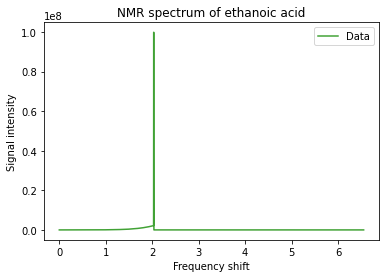

In [ ]:
#Plotting
plt.plot(x, data['Pure Spectrums']['Acetic Acid'], color='#41A235', label ="Data")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('NMR spectrum of ethanoic acid')
plt.xlabel('Frequency shift')
plt.ylabel('Signal intensity')

2. Propanol

Text(0, 0.5, 'Signal intensity')

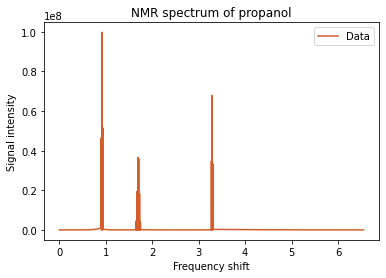

In [ ]:
#Plotting
plt.plot(x, data['Pure Spectrums']['Propanol'], color='#D55C2B', label ="Data")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('NMR spectrum of propanol')
plt.xlabel('Frequency shift')
plt.ylabel('Signal intensity')

3.Propylacetate

Text(0, 0.5, 'Signal intensity')

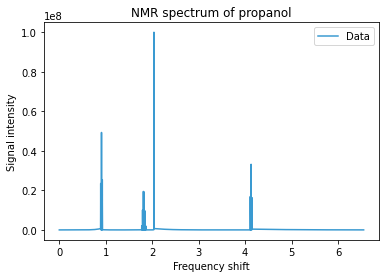

In [ ]:
#Plotting
plt.plot(x, data['Pure Spectrums']['Propylacetate'], color='#3A9AD1', label ="Data")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('NMR spectrum of propanol')
plt.xlabel('Frequency shift')
plt.ylabel('Signal intensity')



---

**Task 2. Write a function that calculate the position and the intensity of each peak in a NMR spectrum. Apply it to ethanoic acid, propanol and propyl-ethanoate:**
---



Now, as it is written above, the fucntion that returns a dictionary with peak values for intensity (as key) and it's correcponding position (as value) has to be written

In [ ]:
def calculate_peaks(x,y,dist: int=1000):
    """
    Calculates the position and intensity of each peak in an NMR spectrum using the findpeaks() function from scipy.signal.

    Parameters:
      y (list or numpy array): The intensity values.

    Returns:
      dict: A dictionary where the keys represent the positions of the peaks (x-values) and the values represent the intensities (y-values) of the peaks.
    """
    # Find the peaks in the data
    peaks = find_peaks(y,distance=dist)[0]
    peak_values = y[peaks]
    peaks_dict = {}

    # Create a dictionary to store the peak positions and intensities
    for i in range(len(peaks)):
      peaks_dict[x[peaks[i]]] = peak_values[i]
    return peaks_dict


Plotting NMR spectrum with peak values

1. Acetic Acid

{2.033: 99871694.67365436}


Text(0, 0.5, 'Signal intensity')

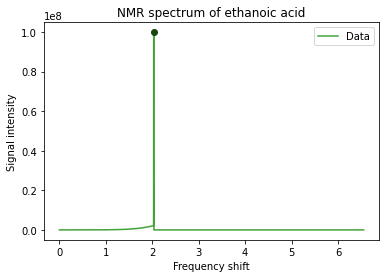

In [ ]:
peaks_acetic_ac = calculate_peaks(x,data['Pure Spectrums']['Acetic Acid'],)
print(peaks_acetic_ac)

#Plotting
acetic_peaks, acetic_values = list(peaks_acetic_ac.keys()), list(peaks_acetic_ac.values())
plt.plot(x, data['Pure Spectrums']['Acetic Acid'], color='#41A235', label ="Data")
plt.plot(acetic_peaks, acetic_values, 'o', color = '#1B450F')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('NMR spectrum of ethanoic acid')
plt.xlabel('Frequency shift')
plt.ylabel('Signal intensity')

2. Propanol

{0.9208000000000001: 99778335.882657, 1.691: 36581375.182853736, 3.2931000000000004: 67905659.27996491}


Text(0, 0.5, 'Signal intensity')

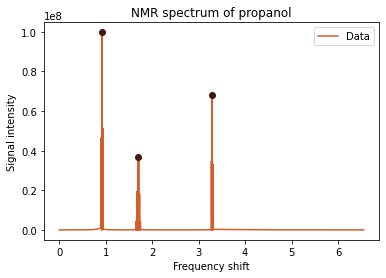

In [ ]:
peaks_propanol = calculate_peaks(x,data['Pure Spectrums']['Propanol'],)
print(peaks_propanol)

#Plotting
propanol_peaks, propanol_values = list(peaks_propanol.keys()), list(peaks_propanol.values())
plt.plot(x, data['Pure Spectrums']['Propanol'], color='#D55C2B', label ="Data")
plt.plot(propanol_peaks, propanol_values, 'o', color = '#45160F')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('NMR spectrum of propanol')
plt.xlabel('Frequency shift')
plt.ylabel('Signal intensity')

3. Propylacetate

{0.9088: 49283733.606042445, 1.8105: 19463454.391941655, 2.0380000000000003: 99968316.98965423, 4.13: 33178466.29357612}


Text(0, 0.5, 'Signal intensity')

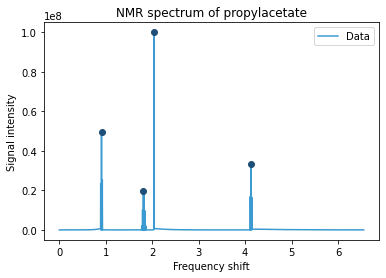

In [ ]:
peaks_propylacetate = calculate_peaks(x,data['Pure Spectrums']['Propylacetate'],)
print(peaks_propylacetate)

#Plotting
propylacetate_peaks, propylacetate_values = list(peaks_propylacetate.keys()), list(peaks_propylacetate.values())
plt.plot(x, data['Pure Spectrums']['Propylacetate'], color='#3A9AD1', label ="Data")
plt.plot(propylacetate_peaks, propylacetate_values, 'o', color = '#1F4E78')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.title('NMR spectrum of propylacetate')
plt.xlabel('Frequency shift')
plt.ylabel('Signal intensity')


---
**Task 3. From the initial spectrum (at t=0), estimate the initial concentration of ethanoic acid, propanol and propyl-ethanoate**
---




To estimate the initial concentration we will need to perform the following steps:

* Obtain the initial spectrum (at t=0): We will obtain this from .dat file

* Find the peaks in the spectrum: This will be done with the calculate_peaks() function

* Determine the wavelength or frequency of each peak: This is the position of the peak on the x-axis of the spectrum.

* Use a reference spectrum: By comparing the peaks in the initial spectrum to a spectrum of a known concentration of the compounds.

* We will also use the dictionary giving the NMR spectrum, 1 µmol/L solution of each compound

In [ ]:
print(data['Measurements'][0]['Data'])
calculate_peaks(x,data['Measurements'][0]['Data'])


[0.00000000e+00 2.26401007e+00 4.52802015e+00 ... 2.43566830e+05
 2.43527235e+05 2.43487640e+05]


{0.9208000000000001: 4989766400.070689,
 1.691: 1844382167.3431742,
 2.033: 1998408808.7929869,
 3.2931000000000004: 3395336020.7728186}

Now we write a function to determine initial concentration of each compound

In [ ]:
def initial_conc(x, y):
  """
  Calculates the concentration of compound in solution

  Parameters:
    x (dict):  peaks of the mixture
    y (dict):  peaks of the pure compound with concentration 1 μmol/L

  Returns:
    c (float): the concentration of the compound in mixture
  """

  c = np.inf
  for i in y.keys():
    if i not in x.keys():
      return 0
    if x[i] / y[i] < c:
      c = x[i] / y[i]
  return c



Thus, we can find the initial concentration for:


*   Acetic Acid
*   Propanol
*   Propylacetate



In [ ]:
print(initial_conc(calculate_peaks(x,data['Measurements'][0]['Data']), peaks_acetic_ac))
print(initial_conc(calculate_peaks(x,data['Measurements'][0]['Data']), peaks_propanol))
print(initial_conc(calculate_peaks(x,data['Measurements'][0]['Data']), peaks_propylacetate))

20.009761677951747
50.000781330674585
0


---
**Task 4. Analyze the NMR spectrums to plot the evolution of the concentration of ethanoic acid, propanol and propyl-ethanoate during the reaction**
---



To analyze NMR spectrums and plot the evolution of the concentration of compounds during a reaction, we need to analyze the extracted data to determine the concentration of each compound at each time point.

In [ ]:
def concentration_time_point(data, peaks, dist: int=50):
    """
    Determines the concentration of each compound at each time point.

    Parameters:
      data:   data from .dat file
      peaks :  peaks of the pure compound with concentration 1 μmol/L

    Returns:
      сhange_concentration (dict): the concentration of the compound in mixture at each time point

    """
    сhange_concentration = {}
    for value in data:
      s_peak = calculate_peaks(x,value['Data'],dist=dist)
      сhange_concentration[value['Time']] = initial_conc(s_peak, peaks)
    return сhange_concentration


Text(0, 0.5, 'Concentration')

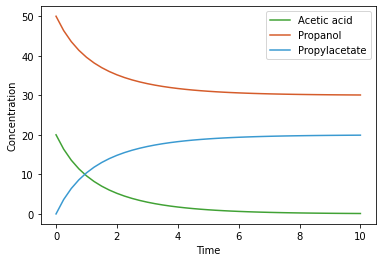

In [ ]:
tp_conc_acetic = concentration_time_point(data['Measurements'], peaks_acetic_ac)
tp_conc_propanol= concentration_time_point(data['Measurements'], peaks_propanol)
tp_conc_propylacetate = concentration_time_point(data['Measurements'], peaks_propylacetate)

#Plotting
plt.plot(list(tp_conc_acetic.keys()), list(tp_conc_acetic.values()),color='#41A235', label='Acetic acid')
plt.plot(list(tp_conc_propanol.keys()), list(tp_conc_propanol.values()),color='#D55C2B', label='Propanol')
plt.plot(list(tp_conc_propylacetate.keys()), list(tp_conc_propylacetate.values()),color='#3A9AD1', label='Propylacetate')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
plt.xlabel('Time')
plt.ylabel('Concentration')

To estimate the value of the reaction constant k from NMR spectroscopy data, you will need to perform the following steps:


[Reactant]/[Product] = kt + 1
where [Reactant] and [Product] are the concentrations of the reactant and product, respectively, t is the time elapsed since the start of the reaction, and k is the reaction rate constant.

Fit the data to the appropriate kinetic model (first-order or second-order) to obtain an estimate of the reaction rate constant k. This can typically be done using a software program or spreadsheet application.



In [ ]:
def dv_dt(x):
  dv = {}
  for i in range(len(x) - 1):
    t = list(x.keys())[i]
    Δt = list(x.keys())[i+1] - t
    dv[t] = (x[t + Δt] - x[t]) / Δt
  return dv

In [ ]:
def velocity_average(t):
  v1 = dv_dt(tp_conc_acetic)[t] * -1    #since those reagents are consumed we multiply them by -1
  v2 = dv_dt(tp_conc_propanol)[t] * -1
  v3 = dv_dt(tp_conc_propylacetate)[t]
  average = np.mean(v1,v2,v3)
  return average

In [ ]:
estimation_k = []
for t in list(tp_conc_acetic.keys())[:-1]:
  k = velocity_average(t) / (tp_conc_acetic[t] * tp_conc_propanol[t])
  estimation_k.append(k)
k = sum(estimation_k) / len(estimation_k)
print (k)